# TASK 3:- BUILDING A DECISION TREE CLASSIFIER

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

dataset:- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing



# Input variables:
   #### Bank client data:
        1 - age (numeric)
        2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
        3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
        4 - education (categorical: "unknown","secondary","primary","tertiary")
        5 - default: has credit in default? (binary: "yes","no")
        6 - balance: average yearly balance, in euros (numeric) 
        7 - housing: has housing loan? (binary: "yes","no")
        8 - loan: has personal loan? (binary: "yes","no")
   #### Related with the last contact of the current campaign:
        9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
        10 - day: last contact day of the month (numeric)
        11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
        12 - duration: last contact duration, in seconds (numeric)
   #### Other attributes:
        13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
        14 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
                    (numeric, -1 means client was not previously contacted)
        15 - previous: number of contacts performed before this campaign and for this client (numeric)
        16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #### Output variable (desired target):
        17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

In [4]:
df=pd.read_csv("C:\\Users\\Larren\\Downloads\\prodigy\\data3\\bank-full.csv")

In [6]:
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [8]:
data=df['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';',expand=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       45211 non-null  object
 1   1       45211 non-null  object
 2   2       45211 non-null  object
 3   3       45211 non-null  object
 4   4       45211 non-null  object
 5   5       45211 non-null  object
 6   6       45211 non-null  object
 7   7       45211 non-null  object
 8   8       45211 non-null  object
 9   9       45211 non-null  object
 10  10      45211 non-null  object
 11  11      45211 non-null  object
 12  12      45211 non-null  object
 13  13      45211 non-null  object
 14  14      45211 non-null  object
 15  15      45211 non-null  object
 16  16      45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


In [12]:
a=df.columns.str.split(";")
a

Index([['age', '"job"', '"marital"', '"education"', '"default"', '"balance"', '"housing"', '"loan"', '"contact"', '"day"', '"month"', '"duration"', '"campaign"', '"pdays"', '"previous"', '"poutcome"', '"y"']], dtype='object')

In [14]:
b=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration','campaign','pdays','previous','poutcome', 'y']

In [16]:
data.columns=b[:len(data.columns)]
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [18]:
d=['age','duration','campaign','pdays','previous','day']
d1=['balance']

In [20]:
data[d]=data[d].astype(int)
data[d1]=data[d1].astype(float)

In [22]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143.0,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29.0,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2.0,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506.0,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1.0,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825.0,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729.0,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715.0,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668.0,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int32  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int32  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int32  
 12  campaign   45211 non-null  int32  
 13  pdays      45211 non-null  int32  
 14  previous   45211 non-null  int32  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(1), int32(6), object(10)
memory usage: 4.8+ MB


In [26]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# EDA


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

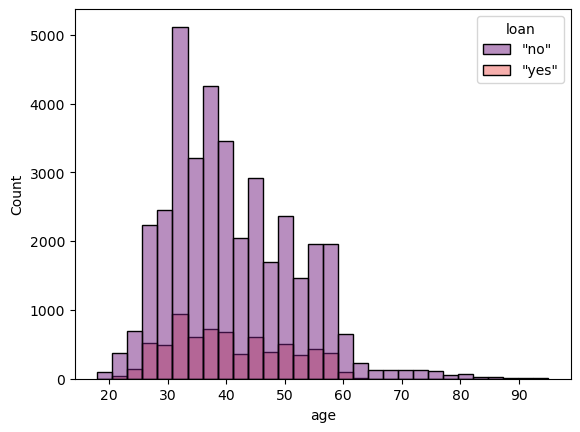

In [126]:
sns.histplot(x='age',data=data,hue='loan',palette='magma',bins=30,color='red')

# Categorical Features

Since job,marital,education,contact,poutcome,month,default,housing,loan columns are categorical.

That means we need to transform them using dummy variables so sklearn will be able to understand them.hem

In [31]:
cat_data=['job','marital','education','contact','poutcome','month','default','housing','loan']

In [33]:
final_data=pd.get_dummies(data,columns=cat_data,drop_first=True,dtype='float')
final_data

,age,balance,day,duration,campaign,pdays,previous,y,"job_""blue-collar""","job_""entrepreneur""",...,"month_""jul""","month_""jun""","month_""mar""","month_""may""","month_""nov""","month_""oct""","month_""sep""","default_""yes""","housing_""yes""","loan_""yes"""
0,58,2143.0,5,261,1,-1,0,"""no""",0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,44,29.0,5,151,1,-1,0,"""no""",0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,33,2.0,5,76,1,-1,0,"""no""",0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,47,1506.0,5,92,1,-1,0,"""no""",1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,33,1.0,5,198,1,-1,0,"""no""",0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825.0,17,977,3,-1,0,"""yes""",0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45207,71,1729.0,17,456,2,-1,0,"""yes""",0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45208,72,5715.0,17,1127,5,184,3,"""yes""",0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45209,57,668.0,17,508,4,-1,0,"""no""",1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X=final_data.drop('y',axis=1)
y=final_data['y']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Training a Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree=DecisionTreeClassifier()

In [47]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [49]:
pred=dtree.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        "no"       0.93      0.93      0.93     13175
       "yes"       0.48      0.50      0.49      1745

    accuracy                           0.88     14920
   macro avg       0.70      0.71      0.71     14920
weighted avg       0.88      0.88      0.88     14920



In [55]:
print(confusion_matrix(y_test,pred))

[[12223   952]
 [  877   868]]


In [58]:
print(accuracy_score(y_test,pred))

0.8774128686327077


### Visualize the Decision Tree 

In [103]:
from sklearn.tree import plot_tree 
from sklearn.preprocessing import LabelEncoder

In [105]:
features = list(X.columns)
classes=list(map(str,data['y']))

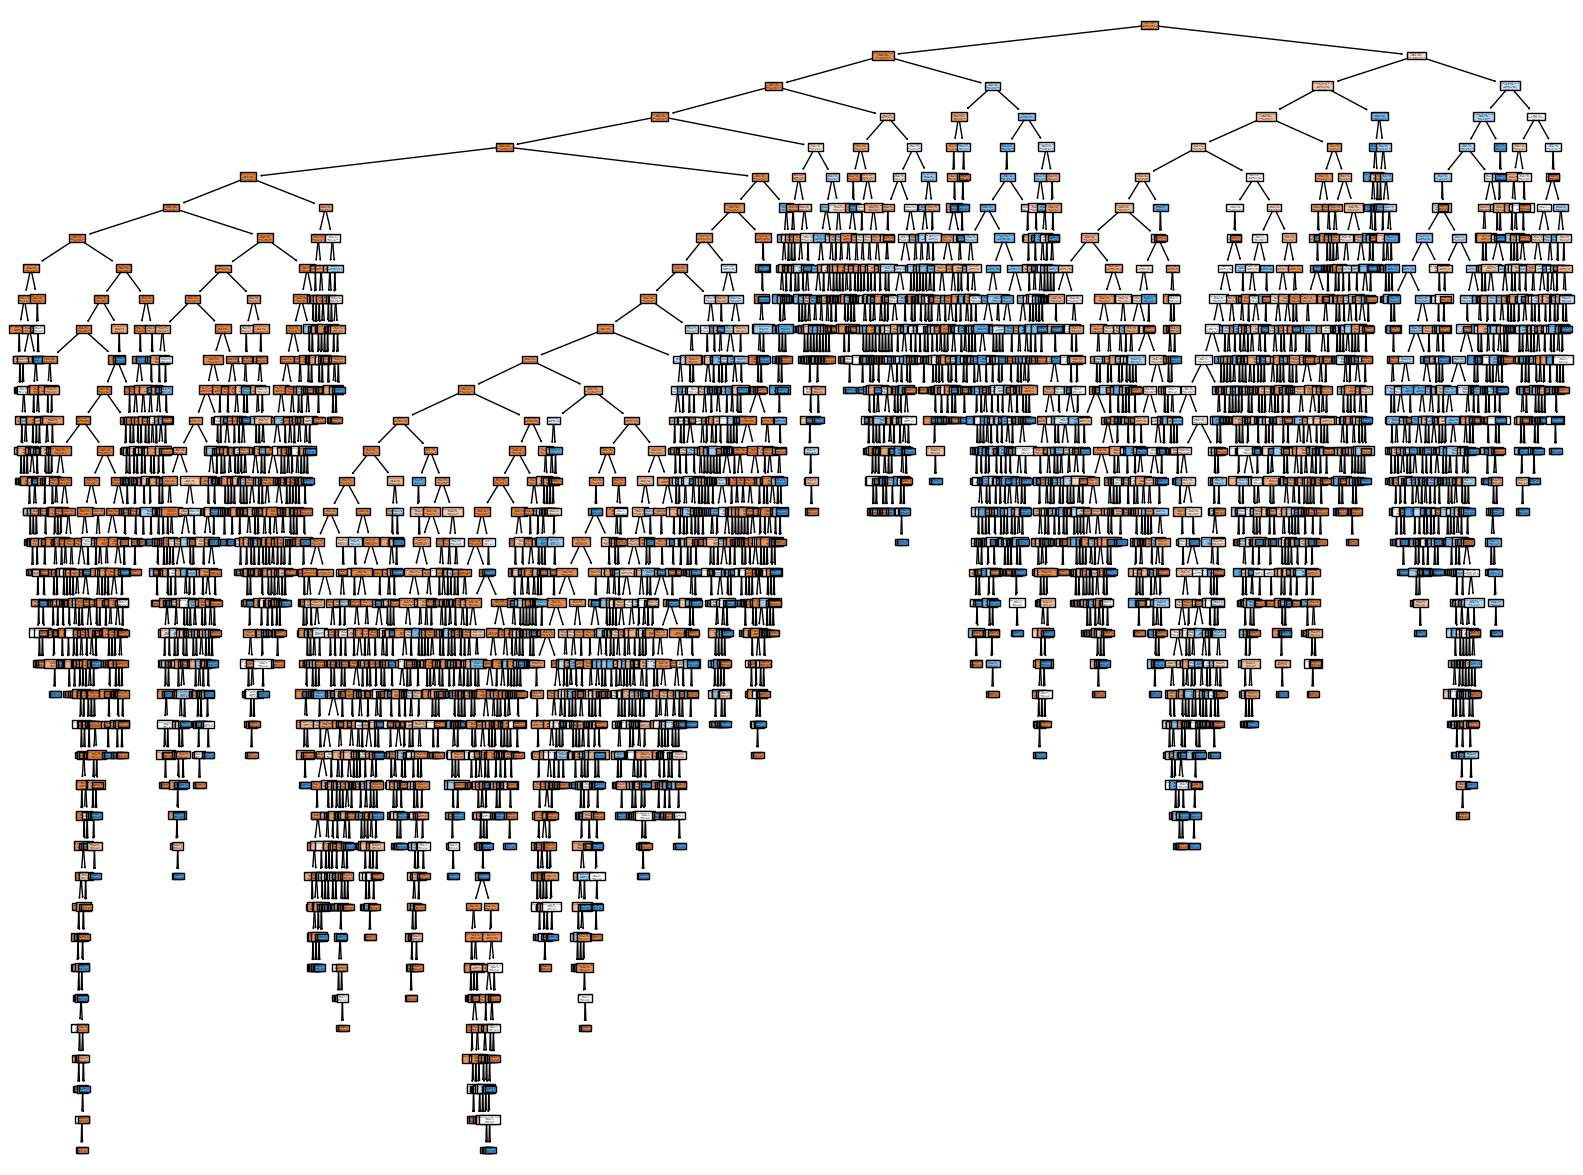

In [100]:
plt.figure(figsize=(20,15))
plot_tree(dtree,filled=True,feature_names=features,class_names=classes)
plt.show()

# Infrence

The model has a overall accuracy of 88% which means it has done a reasonable performance.

Confusion Matrix:

True Positives (TP): 868

True Negatives (TN): 12223

False Positives (FP) : 952

False Negatives (FN) : 877

The client haven't subscribed a term deposit has a higher precision,recall and f1-Score compared those who have subscribed a term deposit.This model is better in predicting in those who haven't subscribed a term deposit. 